# Filtros lineales separables

In [50]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import convolve
from skimage.morphology import footprint_rectangle
from skimage.filters.rank import mean

In [96]:
imagen = cv2.imread('images/meb.png', cv2.IMREAD_GRAYSCALE)

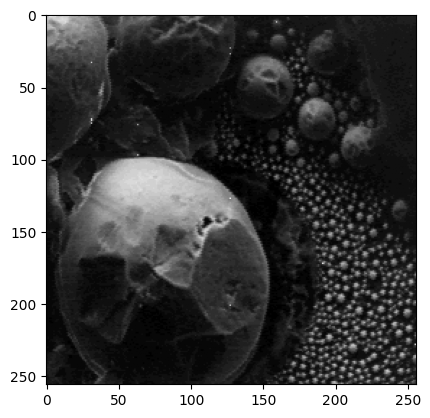

In [95]:
plt.imshow(imagen, cmap='gray', vmin=0, vmax=255)

In [26]:
X = 2048
Y = 2048
imagen_r =  cv2.resize(imagen, (X,Y), interpolation=cv2.INTER_NEAREST)

## Filtro Promedio 3x3

In [27]:
kernel3x3 = np.ones((3, 3), np.float32) / 9
num_iter = 5 
tiempos_3x3 = []
for i in range(num_iter):
    start_time = cv2.getTickCount()
    res3x3 = convolve(imagen_r, kernel3x3,  mode='constant', cval=0)
    time = (cv2.getTickCount() - start_time) / cv2.getTickFrequency()
    tiempos_3x3.append(time)
    print(f'Iteración {i+1} ⏲️: {time:.6f} s')

Iteración 1 ⏲️: 0.039364 s
Iteración 2 ⏲️: 0.046456 s
Iteración 3 ⏲️: 0.038468 s
Iteración 4 ⏲️: 0.039911 s
Iteración 5 ⏲️: 0.036777 s


# Filtro Promedio 3x1 y 1x3

In [28]:
kernel1x3 = np.ones((1, 3), dtype=np.float32) / 3
tiempos = []
for i in range(num_iter):
    start_time = cv2.getTickCount()
    avg = mean(imagen_r, footprint_rectangle((3,1)))
    res3x3_separable = convolve(avg, kernel1x3,  mode='constant', cval=0)
    time = (cv2.getTickCount() - start_time) / cv2.getTickFrequency()
    tiempos.append(time)
    print(f'Iteración {i+1} ⏲️: {time:.6f} s')

Iteración 1 ⏲️: 0.596347 s
Iteración 2 ⏲️: 0.580963 s
Iteración 3 ⏲️: 0.597147 s
Iteración 4 ⏲️: 0.588589 s
Iteración 5 ⏲️: 0.585837 s


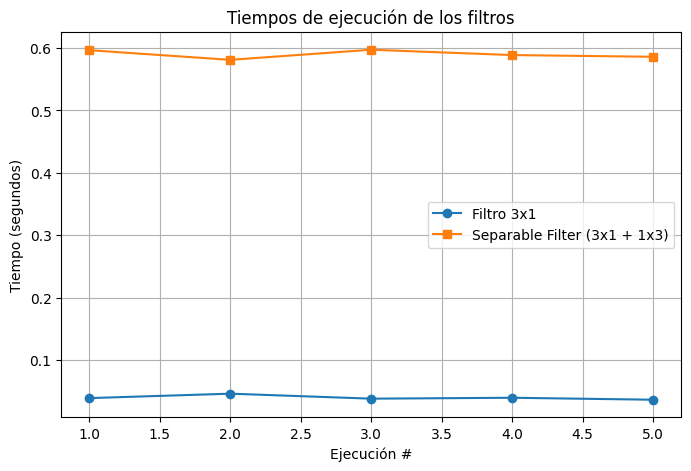

In [29]:
iterations = np.arange(1, len(tiempos) + 1)
plt.figure(figsize=(8,5))
plt.plot(iterations, tiempos_3x3, marker='o', linestyle='-', label='Filtro 3x1')
plt.plot(iterations, tiempos, marker='s', linestyle='-', label='Separable Filter (3x1 + 1x3)')
plt.xlabel("Ejecución #")
plt.ylabel("Tiempo (segundos)")
plt.title("Tiempos de ejecución de los filtros")
plt.legend()
plt.grid(True)
plt.show()


## Efectúe una sustracción de estas imágenes para corroborar el resultado Las dos imágenes resultantes, ¿son idénticas? 

In [ ]:
diff = cv2.subtract(res3x3, res3x3_separable)
print(f'Diferencia entre las imágenes: {np.sum(diff)}')
print(f'Máximo valor de la diferencia: {np.max(diff)}')
print(f'Numero de valores totales: {X*Y}')

Diferencia entre las imágenes: 25443
Máximo valor de la diferencia: 1
Numero de valores totales: 4194304


In [24]:
identical = np.all(diff == 0)
print(f'¿Las imágenes son idénticas?: {identical}')

¿Las imágenes son idénticas?: False


En teoría, las imágenes deberían ser idénticas, ya que el filtro promedio de 3x3 se puede descomponer en la convolución de un filtro 3x1 seguido de un filtro 1x3. Sin embargo, al analizar la matriz resultante, se observa que muchos de los valores son cero, aunque también existen diferencias en algunos elementos. Esto sugiere que la implementación o el proceso de convolución pueden estar introduciendo variaciones inesperadas en la imagen filtrada.

## Revise la siguiente explicación en separabilidad de filtros lineales. Explique la diferencia de los tiempos de ejecución determinando el número de operaciones elementales (SUMA, RESTA) efectuadas por las dos versiones del filtro. 

#### **1. Filtro Promedio**
El **filtro promedio** convoluciona la imagen con un kernel uniforme de tamaño

$$
 ( m \times n )
$$

Cada píxel requiere la suma de valores
$$
( m \times n - 1 ) 
$$

Por tanto el numero total de sumas es:

$$
(m \times n - 1) \times N^2
$$

La complejidad resultante es:

$$
O(N^2 \cdot m \cdot n)
$$

---

#### **2. Filtro Promedio Separable**
La convolución se divide en dos pasos:

- **Filtro horizontal**: Se suman \( m \) valores por fila con desplazamientos eficientes:
  $$
  O(N^2)
  $$
- **Filtro vertical**: Se repite el proceso en columnas:
  $$
  O(N^2)
  $$

Por lo tanto, la complejidad total es:

$$
O(N^2(m+n))
$$

---

#### **Comparación de Complejidades**

$$
O(N^2 \cdot m \cdot n) \gg O(N^2 (m+n)) 
$$

El **filtro separable** es más eficiente, ya que evita cálculos redundantes y reduce drásticamente el número de operaciones.



## Calcule la duración de ejecución que se debería obtener con un filtro promedio 10 veces más grande (es decir de tamaño 30x30). Verifique este resultado experimentalmente e intente explicar el tiempo de cálculo observado (pensando en los métodos de optimización utilizables con el filtro promedio separable).

In [ ]:
imagen = cv2.imread('images/meb.png', cv2.IMREAD_GRAYSCALE)
X = 2048
Y = 2048
imagen_r = cv2.resize(imagen, (X,Y), interpolation=cv2.INTER_NEAREST)

In [55]:
kernel_30x30 = np.ones((30, 30), np.float32) / (30 * 30)
num_iter = 5
tiempos_30x30 = []

for i in range(num_iter):
    start_time = cv2.getTickCount()
    res30x30 = convolve(imagen_r, kernel_30x30,  mode='constant', cval=0)
    time = (cv2.getTickCount() - start_time) / cv2.getTickFrequency()
    tiempos_30x30.append(time)
    print(f'Iteración {i+1} ⏲️: {time:.6f} s')
    

Iteración 1 ⏲️: 3.596491 s
Iteración 2 ⏲️: 3.431596 s
Iteración 3 ⏲️: 3.418085 s
Iteración 4 ⏲️: 3.541040 s
Iteración 5 ⏲️: 3.666448 s


In [56]:
tiempos_separable = []
kernel1x30 = np.ones((1, 30), dtype=np.float32) / 30
for i in range(num_iter):
    start_time = cv2.getTickCount()
    avg = mean(imagen_r, footprint_rectangle((30,1)))
    res30x30_separable = convolve(avg, kernel1x30,  mode='constant', cval=0)
    time = (cv2.getTickCount() - start_time) / cv2.getTickFrequency()
    tiempos_separable.append(time)
    print(f'Iteración Separables {i+1} ⏲️: {time:.6f} s')
    

Iteración Separables 1 ⏲️: 1.554678 s
Iteración Separables 2 ⏲️: 1.451705 s
Iteración Separables 3 ⏲️: 1.305430 s
Iteración Separables 4 ⏲️: 1.338077 s
Iteración Separables 5 ⏲️: 1.349442 s


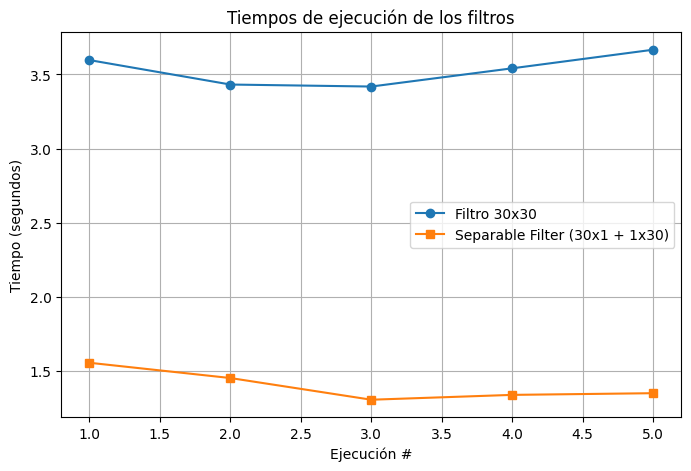

In [57]:
plt.figure(figsize=(8,5))
plt.plot(iterations, tiempos_30x30, marker='o', linestyle='-', label='Filtro 30x30')
plt.plot(iterations, tiempos_separable, marker='s', linestyle='-', label='Separable Filter (30x1 + 1x30)')
plt.xlabel("Ejecución #")
plt.ylabel("Tiempo (segundos)")
plt.title("Tiempos de ejecución de los filtros")
plt.legend()
plt.grid(True)
plt.show()